In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func
from sqlalchemy import Column, Integer, String, Float

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# establish base for classes
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
dateRecent = session.query(measurement.date).order_by(measurement.date.desc()).first()
dateRecent


('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
dateYearOld = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').order_by(measurement.date).all()

# Perform a query to retrieve the data and precipitation scores
lastYear = dt.date(2017, 8, 23) - dt.timedelta(days=365) 
yearPrcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= lastYear).all()

datePrcpY = []
prcpScoreY = []
for x in range(len(yearPrcp)):
    datePrcpY.append(yearPrcp[x][0])
    prcpScoreY.append(yearPrcp[x][1])

Text(0, 0.5, 'Inches')

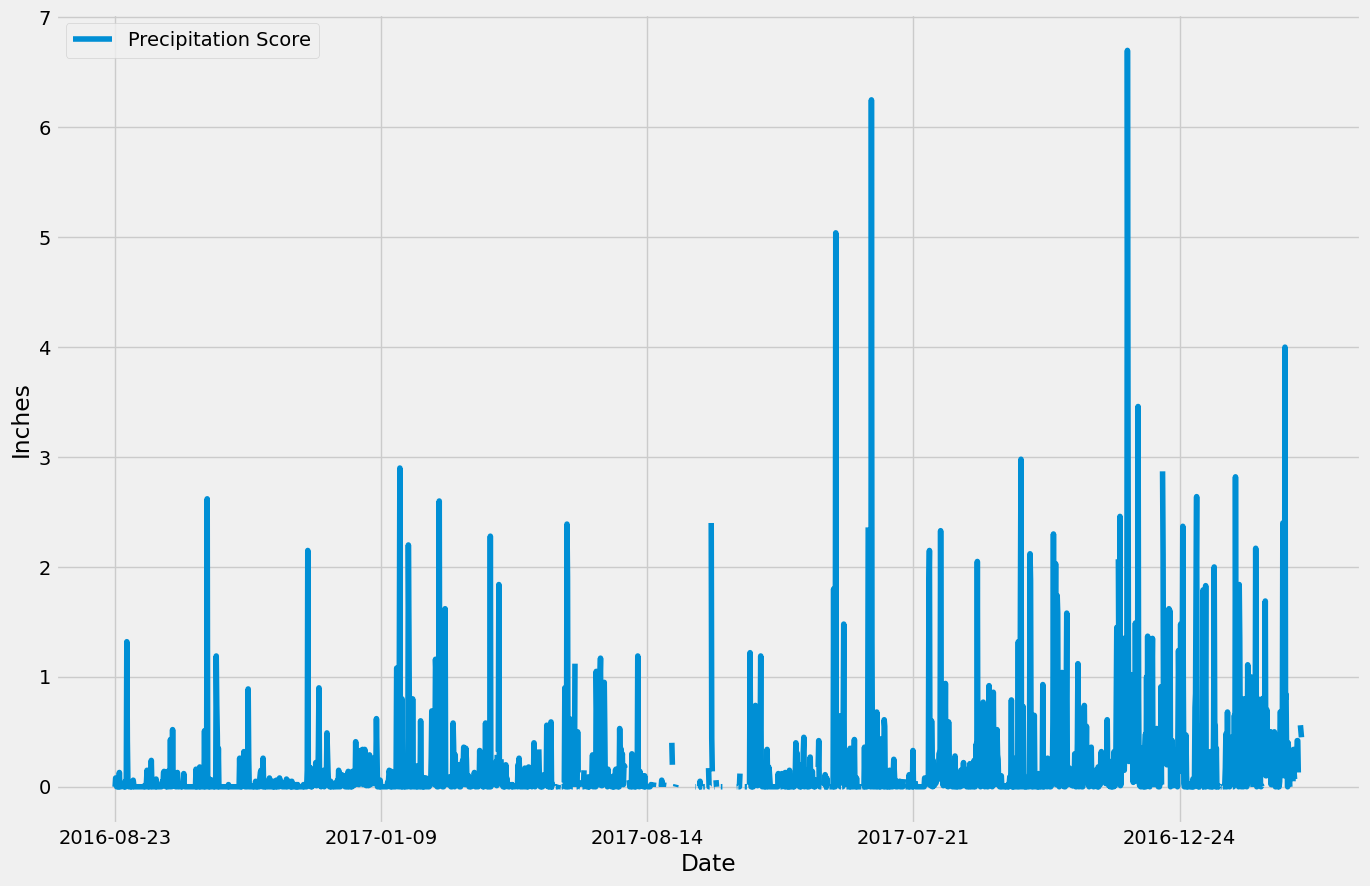

In [19]:

# Save the query results as a Pandas DataFrame. Explicitly set the column names

prcpDB = pd.DataFrame({"Date":datePrcpY,"Precipitation Score":prcpScoreY})

# Sort the dataframe by date
prcpDB.sort_values(by = "Date")

# Use Pandas Plotting with Matplotlib to plot the data
prcpDB.plot(x = "Date",y = "Precipitation Score",figsize=(15,10))
plt.xlabel("Date")
plt.ylabel("Inches")

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcpDB.describe()

,Precipitation Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
numOfStations = session.query(station).count()
numOfStations

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stationRows = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
stationRows

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average tempemostrature.
mostActiveStation = session.query(func.min(measurement.tobs),
                            func.max(measurement.tobs),
                            func.avg(measurement.tobs),
                            func.count(measurement.tobs))\
    .filter(measurement.station=='USC00519281').all()
mostActiveStation

[(54.0, 85.0, 71.66378066378067, 2772)]

Text(0, 0.5, 'Frequency')

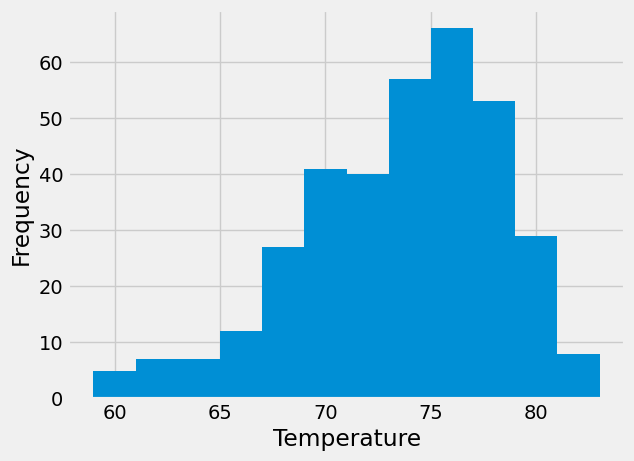

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mostActiveTemp = session.query(measurement.tobs).filter(measurement.station=='USC00519281')\
    .filter(measurement.date >='2016-08-23').all()
stationTempDF = pd.DataFrame(mostActiveTemp, columns=["Temperature"])
plt.hist(stationTempDF, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close Session

In [ ]:
# Close Session
session.close()